In [77]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [78]:
delivery = pd.read_csv('delivery_time.csv')

In [79]:
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [80]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [81]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [82]:
delivery.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [83]:
delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: xlabel='Delivery Time', ylabel='Count'>

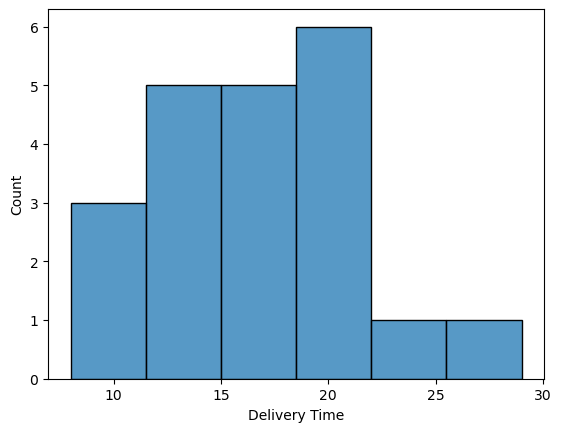

In [84]:
sns.histplot(delivery['Delivery Time'])



<Axes: xlabel='Sorting Time', ylabel='Count'>

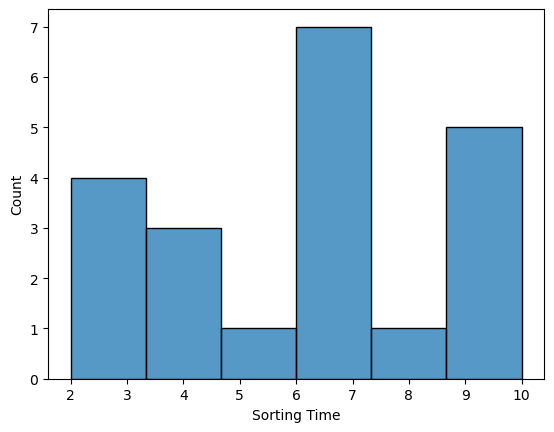

In [85]:
sns.histplot(delivery['Sorting Time'])

# Scatter Plot 

Text(0, 0.5, 'Sorting Time')

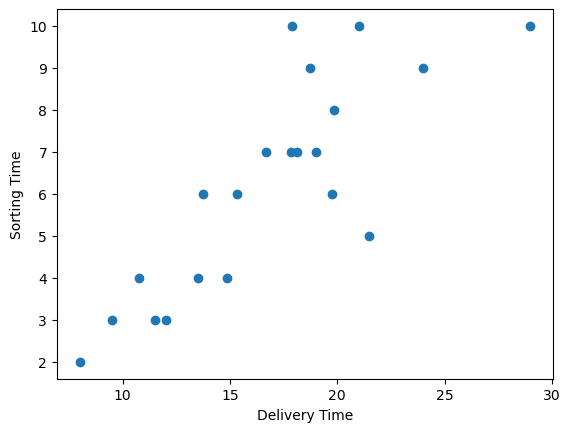

In [86]:
plt.scatter(x = delivery['Delivery Time'],y=delivery['Sorting Time'])
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')

In [87]:
x = delivery['Delivery Time']

In [88]:
y = delivery['Sorting Time']

# Predicting Without Transformation

In [89]:
import statsmodels.formula.api as smf

In [90]:
ols = smf.ols('y~x',data =delivery)

In [91]:
model=ols.fit()

In [92]:
model

In [93]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           3.98e-06
Time:                        14:21:15   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7567      1.134     -0.667      0.513      -3.130       1.617
x              0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Got the R-squared:	0.682 and Adj. R-squared:	0.666

In [94]:
Y = 0.4137*delivery['Delivery Time']+(-0.7567)

# Predicting Line

Text(0, 0.5, 'Sorting Time')

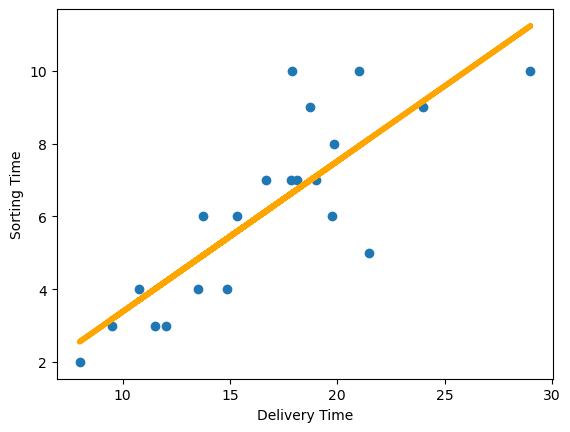

In [95]:
plt.scatter(x,y)
plt.plot(delivery['Delivery Time'],Y,lw=4,c='orange',label='regression line')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')

# Square Root Transformation

In [96]:
sqrt_delivery = np.sqrt(delivery['Delivery Time'])
sqrt_sorting = np.sqrt(delivery['Sorting Time'])

<Axes: xlabel='Delivery Time', ylabel='Density'>

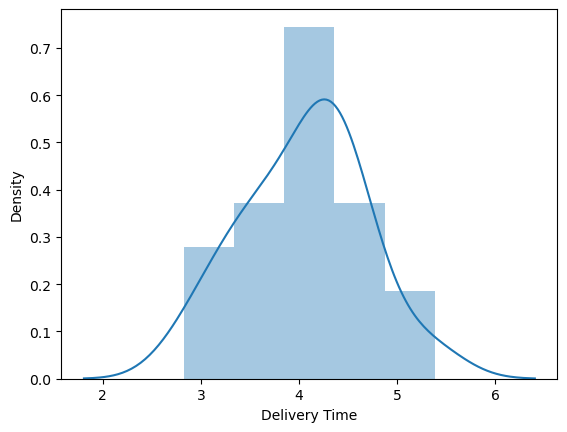

In [97]:
sns.distplot(sqrt_delivery)

<Axes: xlabel='Sorting Time', ylabel='Density'>

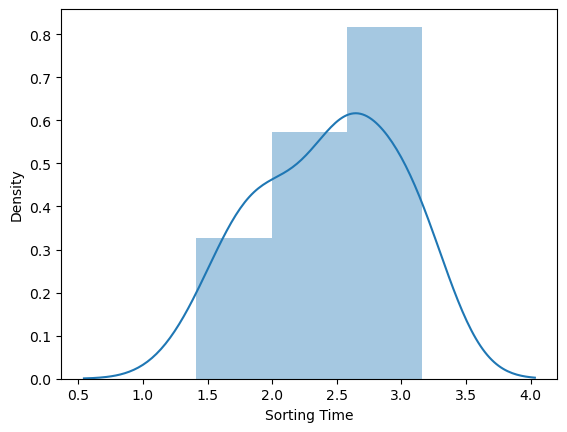

In [98]:
sns.distplot(sqrt_sorting)

In [99]:
ols1 = smf.ols('sqrt_delivery~sqrt_sorting',data = delivery)
model1 = ols1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          sqrt_delivery   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           8.48e-07
Time:                        14:21:18   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.6135      0.349      4.628      0.000       0.884       2.343
sqrt_sorting     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Got the R-squared:	0.729 and Adj. R-squared:	0.715.As we can see r2 score and Adj.R-squared has been improved after sqrt tranformation



# Cube Root Transformation

In [100]:
cbrt_delivery = np.cbrt(delivery['Delivery Time'])
cbrt_sorting = np.cbrt(delivery['Sorting Time'])

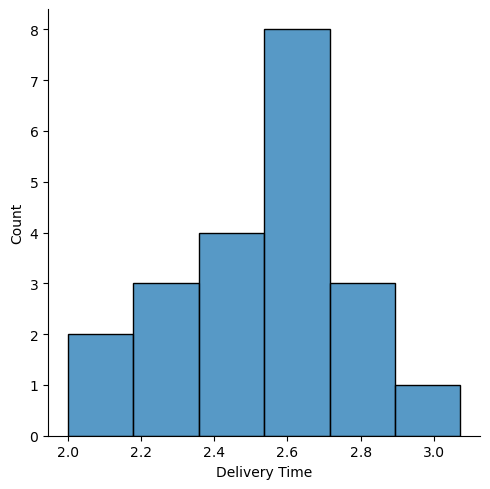

In [101]:
sns.displot(cbrt_delivery)

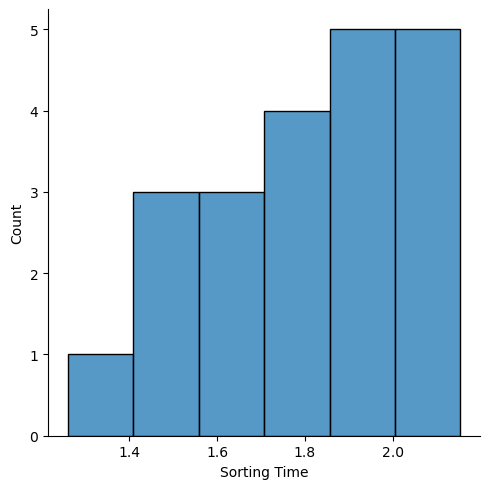

In [102]:
sns.displot(cbrt_sorting)

In [103]:
ols2 = smf.ols('cbrt_delivery~cbrt_sorting',data=delivery)
model2 = ols2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          cbrt_delivery   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     55.25
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           4.90e-07
Time:                        14:21:19   Log-Likelihood:                 13.035
No. Observations:                  21   AIC:                            -22.07
Df Residuals:                      19   BIC:                            -19.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0136      0.207      4.900      0.000       0.581       1.447
cbrt_sorting     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Got the R-squared: 0.744 and Adj. R-squared: 0.731.As we can see r2 score and Adj.R-squared has been improved after cube root tranformation

# Log Transformation

In [104]:
log_delivery = np.log(delivery['Delivery Time'])
log_sorting = np.log(delivery['Sorting Time'])

In [105]:
log_delivery

0     3.044522
1     2.602690
2     2.983153
3     3.178054
4     3.367296
5     2.731115
6     2.944439
7     2.251292
8     2.884801
9     2.931194
10    2.987196
11    2.374906
12    2.814210
13    2.442347
14    2.487404
15    2.700018
16    2.621039
17    2.896464
18    2.079442
19    2.880882
20    3.068053
Name: Delivery Time, dtype: float64

<Axes: xlabel='Delivery Time', ylabel='Density'>

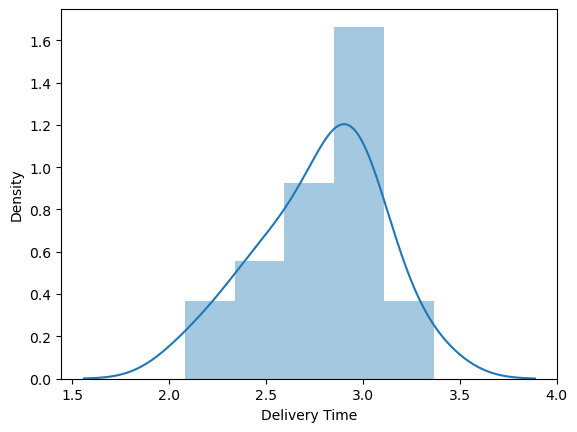

In [106]:
sns.distplot(log_delivery)

<Axes: xlabel='Sorting Time', ylabel='Density'>

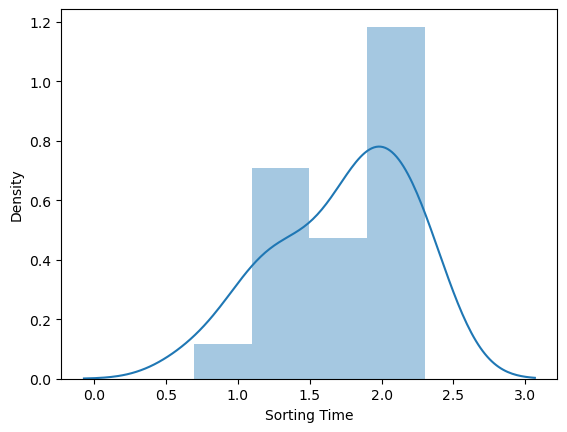

In [107]:
sns.distplot(log_sorting)

In [108]:
ols3 = smf.ols('log_delivery~log_sorting',data = delivery)
model3 = ols3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_delivery   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           1.60e-07
Time:                        14:21:20   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.7420      0.133     13.086      0.000       1.463       2.021
log_sorting     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# As we can see ,we got the best r2 score(0.772) and Adj.R-squared(0.760) after the log tranformation

# Lets make a Dataframe of predicted delivery time

In [109]:
model3.predict(delivery[['Delivery Time']])

0     3.117833
1     2.570329
2     2.812603
3     3.054878
4     3.117833
5     2.812603
6     2.904712
7     2.398432
8     3.117833
9     3.054878
10    2.984500
11    2.570329
12    2.904712
13    2.398432
14    2.398432
15    2.570329
16    2.812603
17    2.904712
18    2.156158
19    2.904712
20    2.703662
dtype: float64

In [110]:
a = np.exp(model3.predict(delivery[['Delivery Time']]))

In [111]:
a

0     22.597360
1     13.070123
2     16.653216
3     21.218593
4     22.597360
5     16.653216
6     18.259981
7     11.005911
8     22.597360
9     21.218593
10    19.776608
11    13.070123
12    18.259981
13    11.005911
14    11.005911
15    13.070123
16    16.653216
17    18.259981
18     8.637887
19    18.259981
20    14.934324
dtype: float64

In [112]:
df = pd.DataFrame()
df['Sorting Time']= delivery['Sorting Time']
df['Delivery Time']= delivery['Delivery Time']
df['Predicted Delivery Time Log'] = a

In [113]:
df

,Sorting Time,Delivery Time,Predicted Delivery Time Log
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593
